In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 
import sys

In [2]:
import ktrain
from ktrain import vision
import keras.backend as K

Using TensorFlow backend.


In [3]:
# load cifar10 and manually standaridize
from keras.datasets import cifar10
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_train = (x_train - x_train.mean(axis=0)) / (x_train.std(axis=0))
x_test = x_test.astype('float32')
x_test = (x_test - x_test.mean(axis=0)) / (x_test.std(axis=0))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
x_train[0].shape

(32, 32, 3)

In [11]:
input_shape = (3, 32, 32) if K.image_dim_ordering() == 'th' else (32, 32, 3)

In [9]:
# define data augmentation turn featurewise* off, since we've manually standardized above
data_aug = vision.get_data_aug(featurewise_center=False, 
                               featurewise_std_normalization=False,
                               horizontal_flip=True,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.0,
                               rotation_range=10)

In [12]:
# load training and validation data as generators with data augmentation
(train_data, val_data, preproc) = vision.images_from_array(x_train, y_train, 
                                                  validation_data=(x_test, y_test),
                                                  data_aug=data_aug)

In [13]:
# let's examine the available image classifiers
vision.print_image_classifiers()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default Convolutional Neural Network


In [14]:
# load a 22-layer Wide ResNet
model = vision.image_classifier('wrn22', train_data, val_data)

Is Multi-Label? False
Wide Residual Network-22-6 created.


In [16]:
# get a Learner object to be used in training
learner = ktrain.get_learner(model, train_data=train_data, val_data=val_data, 
                             workers=8, use_multiprocessing=True, batch_size=64)

In [17]:
# find a good learning rate
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
781/781 [==============================] - 54s 69ms/step - loss: 6.9901 - acc: 0.1210
Epoch 2/5
781/781 [==============================] - 48s 62ms/step - loss: 5.7066 - acc: 0.3097
Epoch 3/5
781/781 [==============================] - 49s 63ms/step - loss: 2.2498 - acc: 0.5087
Epoch 4/5
781/781 [==============================] - 50s 64ms/step - loss: 2.2908 - acc: 0.3730
Epoch 5/5
163/781 [=====>........................] - ETA: 41s - loss: 5.8823 - acc: 0.1258

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


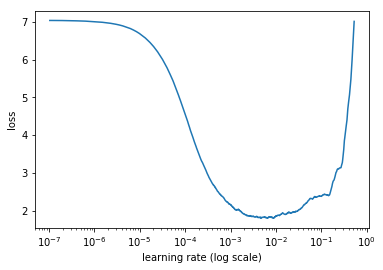

In [18]:
learner.lr_plot()

In [19]:
# fit using onecycle policy
learner.fit_onecycle(1e-3, 30)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/30
781/781 [==============================] - 52s 67ms/step - loss: 3.6463 - acc: 0.4245 - val_loss: 2.2787 - val_acc: 0.5780
Epoch 2/30

781/781 [==============================] - 52s 67ms/step - loss: 1.9168 - acc: 0.6518 - val_loss: 1.7150 - val_acc: 0.6868
Epoch 3/30
781/781 [==============================] - 54s 69ms/step - loss: 1.4967 - acc: 0.7325 - val_loss: 1.4250 - val_acc: 0.7432
Epoch 4/30
781/781 [==============================] - 54s 70ms/step - loss: 1.2700 - acc: 0.7699 - val_loss: 1.2060 - val_acc: 0.7805
Epoch 5/30
781/781 [==============================] - 54s 69ms/step - loss: 1.1261 - acc: 0.7919 - val_loss: 1.1343 - val_acc: 0.7761
Epoch 6/30

781/781 [==============================] - 54s 70ms/step - loss: 1.0362 - acc: 0.8054 - val_loss: 0.9961 - val_acc: 0.8114
Epoch 7/30
781/781 [==============================] - 54s 69ms/step - loss: 0.9640 - acc: 0.8139 - val_loss: 1.0051 - val_acc: 0.80